<a href="https://colab.research.google.com/github/Young4424/ML_DL_practice/blob/main/Ch4_%EB%8B%A4%EC%96%91%ED%95%9C_%EB%B6%84%EB%A5%98%EC%9D%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-1 로지스틱 회귀

럭키백 : 랜덤박스 상자

- **머신러닝으로 럭키백의 생선이 어떤 타깃에 속하는 지 확률을 구할 수 있을까?**


#### 럭키백의 확률 구하기

- 특성 : 길이, 높이, 두께, 대각선 길이, 무게 활용 가능



### 데이터 준비하기

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [5]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy()

### 훈련 세트, 테스트 세트 분할

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [9]:
# Standard Scaler 클래스를 활용한 훈련 세트와 테스트 세트의 표준화

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


### k- 최근접 이웃 분류기의 확률 예측

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


- 이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중 분류(multiclass classification)**라고 부른다.

In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


cf) KNeighborsClassifier에서 정렬된 타깃값은 classes_속성에 저장되어 있다.
- (Bream, Parkki, Perch, Pike, Roach, Smelt, Whitefish)에 대한 확률을 보여주고 있다.

In [14]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4)) # 소수점 다섯 번째 자리에서 반올림 한다.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
# 이 모델이 계산된 확률이 가장 가까운 이웃의 비율이 맞는지 확인하기
# 네 번째 샘플의 최근접 이웃의 클래스를 확인하기

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀

**z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width)**

- 여기에서,a,b,c,d,e는 가중치 혹은 계수임
- **z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꿔보자.**

$$
S(x) = \frac{1}{1 + e^{-z}}
$$



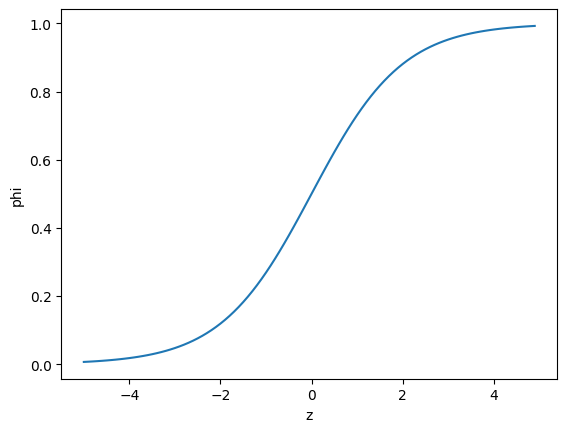

In [17]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 불리언 인덱싱

넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다.

In [18]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


이와 같은 방식으로 훈련세트에서 도미(Bream)과 빙어(Smelt)의 행만 골라내자.


In [19]:
# 도미와 빙어에 대한 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
traget_bream_smelt = train_target[bream_smelt_indexes]

In [20]:
# Logistic Regression으로 훈련시키기

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, traget_bream_smelt)

LogisticRegression()

In [22]:
# 처음 5개의 샘플을 예측한다.
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
# 예측 확률을 출력하기
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [24]:
print(lr.classes_)

['Bream' 'Smelt']


In [25]:
# 로지스틱 회구가 학습한 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


이 로지스틱 회귀 모델이 하습한 방정식은 다음과 같다.

$$
z = -0.404 \times \text{Weight} - 0.576 \times \text{Length} - 0.663 \times \text{Diagonal} - 1.013 \times \text{Height} - 0.732 \times \text{Width} - 2.161
$$


In [26]:
# 처음 5개 샘플의 z값을 출력하기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [27]:
# 파이썬의 scipy 라이브러리에도 시그모이드 함수가 있음
# np.exp() 함수를 사용하여 분수 계산하는 것 보다 편리하고 안전함

from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


### 로지스틱 회귀로 다중 분류 수행하기

- 릿지 회귀와 같이 계수의 제곱을 규제한다. 이러한 규제를 L2 규제라고 한다.
- C : 규제를 제어하는 변수, alpha와는 달리, C는 작을수록 규제가 커진다. 기본값은 1

In [29]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [30]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [31]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [32]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 5개의 특성을 사용하므로, coef_ 배열의 열은 5개다.
- 행과 intercept가 7개라는 것은 z를 7개나 계산한다는 의미

In [33]:
print(lr.coef_.shape,lr.intercept_.shape)

(7, 5) (7,)


- 다중 분류에서는 소프트맥스(softmax) 함수를 사용하여 7개의 z값을 확률로 변환한다.

---

**1. 시그모이드 함수 (Sigmoid Function)**

- **정의**: 입력 값을 0과 1 사이의 값으로 변환하는 S자 형태의 함수

- **수식**:

  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$

- **용도**: 주로 **이진 분류(Binary Classification)** 문제에서 사용됨. 출력이 0과 1 사이의 확률 값으로 해석되어, 특정 클래스에 속할 확률을 나타낸다.




**2. 소프트맥스 함수 (Softmax Function)**

- **정의**: 여러 입력 값들을 받아 각 값이 전체 합에서 차지하는 비율로 변환하여, 출력 값들의 합이 1이 되도록 하는 함수

- **수식**:

  $$
  \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
  $$


  여기서 \( z_i \)는 i번째 클래스의 입력 값이며, K는 클래스의 총 개수이다.

- **용도**: **다중 분류(Multi-Class Classification)** 문제에서 사용된다. 각 클래스에 속할 확률을 출력하며, 이 확률들의 합은 1이 된다.



**3. 주요 차이점**

- **출력 범위**:

  - 시그모이드 함수: 각 출력이 0과 1 사이의 값을 가진다.

  - 소프트맥스 함수: 각 출력이 0과 1 사이의 값을 가지며, 모든 출력의 합이 1이 된다.


- **사용 사례**:

  - 시그모이드 함수: 이진 분류 문제의 출력층에서 사용

  - 소프트맥스 함수: 다중 분류 문제의 출력층에서 사용



### 소프트 맥스 함수


소프트맥스 함수는 여러 입력 값에 대해 각 값이 전체 합에서 차지하는 비율을 계산하여, 모든 출력 값의 합이 1이 되도록 변환하는 함수이다. 이를 통해 각 입력 값이 특정 클래스에 속할 확률을 계산할 수 있다.

주어진 7개의 값 $( z_1 $)부터 $( z_7 $)까지에 대해 소프트맥스 함수를 적용하는 과정을 정리하면 다음과 같다.


---

**1. 각 \( z_i \)에 대한 지수 함수 계산**

각 입력 값 \( z_i \)에 대해 지수 함수를 적용한다.

$$
e^{z_1}, e^{z_2}, e^{z_3}, e^{z_4}, e^{z_5}, e^{z_6}, e^{z_7}
$$

---

**2. 지수 함수 값의 총합 계산**

계산된 지수 함수 값들을 모두 더하여 \( e\_sum \)을 구한다

$$
e\_sum = e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4} + e^{z_5} + e^{z_6} + e^{z_7}
$$

---

**3. 각 확률 값 계산**

각 지수 함수 값을 \( e\_sum \)으로 나누어 각 입력 값이 특정 클래스에 속할 확률 \( s_i \)를 계산한다.

$$
s_1 = \frac{e^{z_1}}{e\_sum}, \quad s_2 = \frac{e^{z_2}}{e\_sum}, \quad \dots, \quad s_7 = \frac{e^{z_7}}{e\_sum}
$$


---

**4. 확률 값의 총합 확인**

계산된 확률 값들의 합은 다음과 같이 1이 된다.

$$
s_1 + s_2 + s_3 + s_4 + s_5 + s_6 + s_7 = 1
$$

이는 소프트맥스 함수의 특성상 모든 클래스에 대한 확률의 합이 항상 1이 되기 때문이다.



In [34]:
# 처음 5개 샘플에 대한 z1~z7의 값을 구하기

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [36]:
from scipy.special import softmax
proba = softmax(decision,axis=1) # 각 행에 대해 스프트맥스를 계산한다.

print(np.round(proba,decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
